# Exploratory Data Analysis -- Flikr8K dataset

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [11]:
DATA_DIR = './data'
IMAGES_DIR = os.path.join(DATA_DIR, 'Images')
CAPTIONS_FILE = os.path.join(DATA_DIR, 'captions.txt')

### Общи данни: брой изображения и описания

In [14]:
df = pd.read_csv(CAPTIONS_FILE, sep=',', names=['image', 'caption'], header=None)

print(f"Total Captions: {len(df)}")
print(f"Unique Images: {df['image'].nunique()}")
display(df.head())

Total Captions: 40456
Unique Images: 8092


,image,caption
0,image,caption
1,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
2,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
3,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
4,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...


### Генериране на произволни sample-и

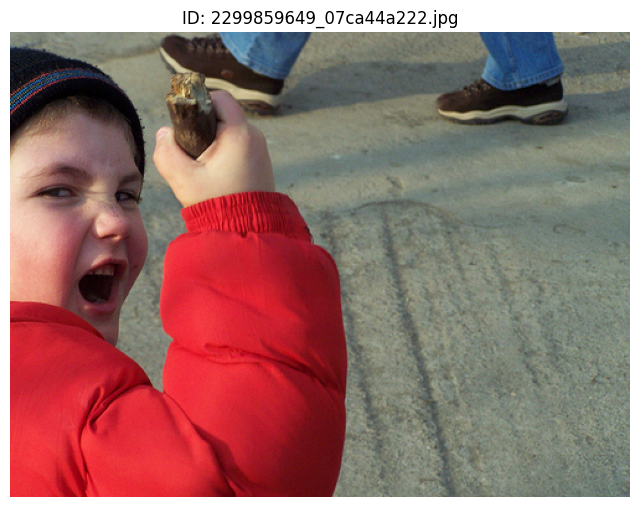

Captions:
- A boy in a red jacket holding a stick and yelling .
- A kid turns around with an object in hand while someone passes behind him .
- A young boy holds up a candy bar while yelling .
- A young boy wearing a red coat eats a chocolate bar .
- A young boy wearing a red winter coat is eating and holding up a candy bar .
--------------------------------------------------


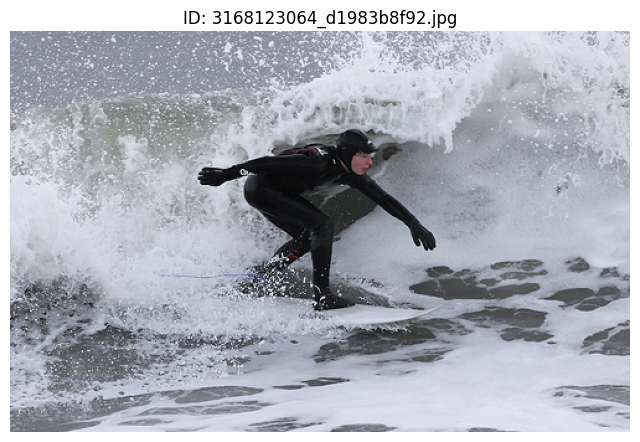

Captions:
- A person in a black wetsuit is surfing in the ocean with a wave coming down .
- A person is surfing .
- A surfer in all black is riding a wave .
- A surfer rides the waves .
- A woman in a black wetsuit surfs in bad weather .
--------------------------------------------------


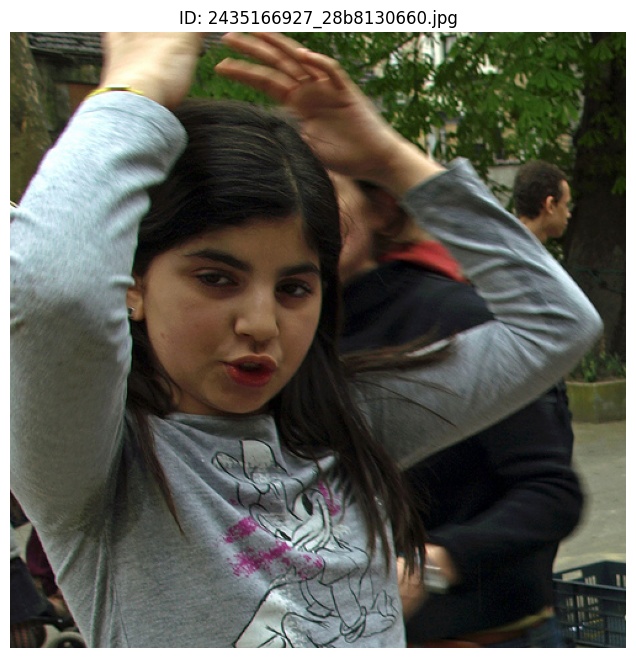

Captions:
- A girl in a gray shit is throwing her hands up .
- A girl in a grey shirt puts her hands over her head in a gesture .
- A young dark haired girl with her hands raised over her head .
- A young girl in a grey illustrated shirt is holding her hands over her head .
- A young girl raises her arms over her head in front of a couple of other people in the park .
--------------------------------------------------


In [15]:
def visualize_sample(df, num_samples=3):
    unique_images = df['image'].unique()
    samples = np.random.choice(unique_images, num_samples, replace=False)

    for img_name in samples:
        img_path = os.path.join(IMAGES_DIR, img_name)

        captions = df[df['image'] == img_name]['caption'].values

        try:
            image = Image.open(img_path)
            plt.figure(figsize=(8, 8))
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"ID: {img_name}")
            plt.show()

            print("Captions:")
            for cap in captions:
                print(f"- {cap}")
            print("-" * 50)

        except FileNotFoundError:
            print(f"Warning: Image {img_name} not found in {IMAGES_DIR}")

visualize_sample(df)